In [6]:
from sqlalchemy import create_engine
import pandas as pd


engine = create_engine('mysql+pymysql://root:@localhost:3306/PRACTICA')


df_projects = pd.read_sql_table('PR_PROYECTOS', con=engine)


df_projects["F_INICIO"] = pd.to_datetime(df_projects["F_INICIO"])
df_projects["F_FIN"] = pd.to_datetime(df_projects["F_FIN"])
df_projects["F_BAJA"] = pd.to_datetime(df_projects["F_BAJA"])


In [7]:
print(df_projects.columns)

Index(['ID_PROYECTO', 'TX_DESCRIPCIÓN', 'F_INICIO', 'F_FIN', 'F_BAJA',
       'TX_LUGAR', 'TX_OBSERVACIONES'],
      dtype='object')


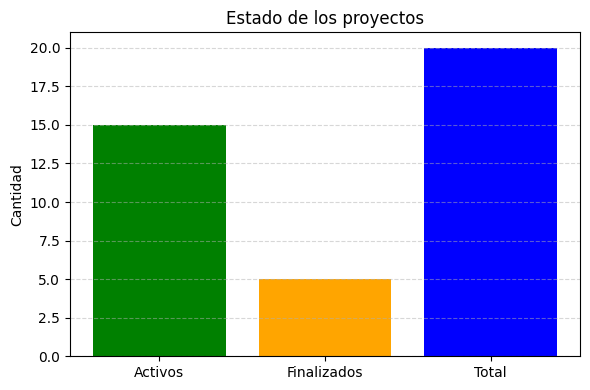

In [8]:
import matplotlib.pyplot as plt

active = df_projects[df_projects["F_FIN"].isna()]
finished = df_projects[df_projects["F_FIN"].notna()]
counts = [len(active), len(finished), len(df_projects)]
labels = ["Activos", "Finalizados", "Total"]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=["green", "orange", "blue"])
plt.title("Estado de los proyectos")
plt.ylabel("Cantidad")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



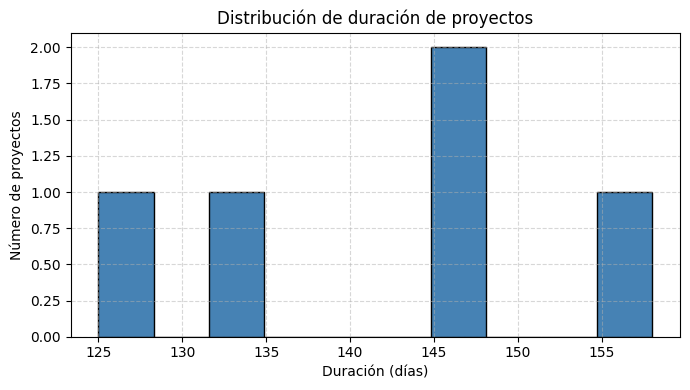

In [9]:
duraciones = df_projects[df_projects["F_FIN"].notna()].copy()
duraciones["DURACIÓN_DÍAS"] = (duraciones["F_FIN"] - duraciones["F_INICIO"]).dt.days

plt.figure(figsize=(7, 4))
plt.hist(duraciones["DURACIÓN_DÍAS"], bins=10, color="steelblue", edgecolor="black")
plt.title("Distribución de duración de proyectos")
plt.xlabel("Duración (días)")
plt.ylabel("Número de proyectos")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


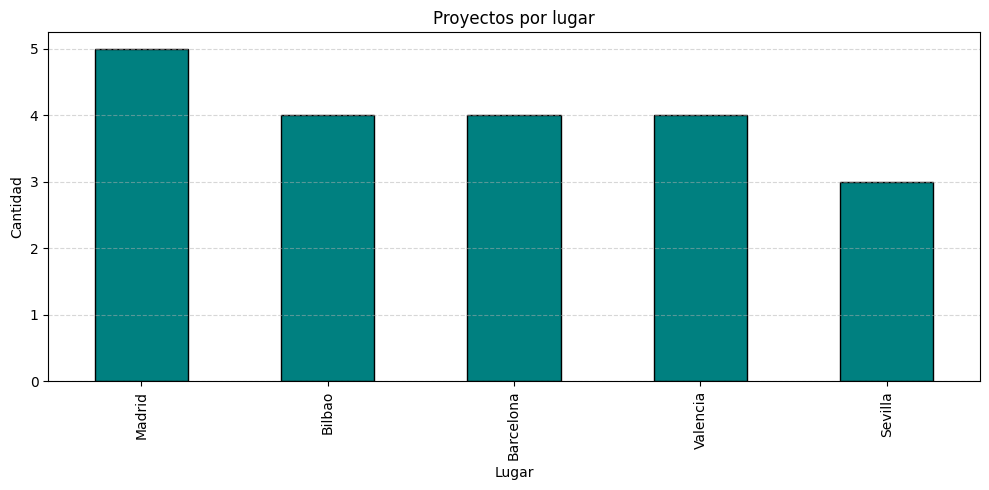

In [10]:
lugares = df_projects["TX_LUGAR"].fillna("Desconocido").value_counts()

plt.figure(figsize=(10, 5))
lugares.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Proyectos por lugar")
plt.xlabel("Lugar")
plt.ylabel("Cantidad")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
